https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

In [1]:
pip install kagglehub #библиотека для скачивания с каггл

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#библиотека'


In [2]:
#скачаем последнюю версию с kaggle
import kagglehub

path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ruzho\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2


## О наборе данных

Параметры вычисляются на основе оцифрованного изображения тонкоигольной аспирационной биопсии (FNA) образования в молочной железе. Они описывают характеристики клеточных ядер, присутствующих на изображении.

Атрибутивная информация:

* 1)  ID number - Идентификационный номер
* 2)  Diagnosis - Диагноз (M = злокачественный, B = доброкачественный)/(M = malignant, B = benign)
* 3)

* Для каждого клеточного ядра вычисляются десять вещественных признаков:

* а) радиус (среднее значение расстояний от центра до точек на периметре)
* б) текстура (стандартное отклонение значений в градациях серого)
* в) периметр
* г) площадь
* д) гладкость (локальные изменения длины радиуса)
* е) компактность (периметр^2 / площадь - 1,0)
* ж) вогнутость (выраженность вогнутых участков контура)
* з) вогнутые точки (количество вогнутых участков контура)
* и) симметрия
* к) фрактальная размерность («приближение береговой линии» - 1)

Для каждого изображения были вычислены среднее значение, стандартная ошибка и «наихудшее» или наибольшее (среднее значение из трёх
наибольших значений) из этих характеристик,
в результате чего получилось 30 характеристик. Например, поле 3 — это средний радиус, поле
13 — стандартная ошибка радиуса, поле 23 — наихудший радиус.

Все значения признаков перекодированы четырьмя значащими цифрами.

Отсутствующие значения атрибутов: отсутствуют

Распределение по классам: 357 доброкачественных, 212 злокачественных

https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf;jsessionid=944B13EC1D0D6DCB528D22A999948C8E?sequence=1
* ссылка на статью 
## Извлечение ядерных признаков для диагностики опухоли молочной железы
У. Стрит, У. Вольберг, О. Мангасарян
Опубликовано в журнале «Электронная визуализация» 29 июля 1993 г.
Медицина

### Аннотация
Для создания высокоточной системы диагностики опухолей молочной железы были использованы интерактивные методы обработки изображений, а также индуктивный классификатор на основе линейного программирования. Небольшая часть препарата, полученного с помощью тонкоигольной аспирационной биопсии, отбирается и оцифровывается. Это позволяет проводить точный автоматизированный анализ размера, формы и текстуры ядер. Для каждого ядра вычисляются десять таких характеристик, и для диапазона изолированных клеток определяются среднее значение, наибольшее (или «наихудшее») значение и стандартная ошибка каждой характеристики. После анализа таким образом 569 изображений были протестированы различные комбинации характеристик, чтобы найти те, которые лучше всего отделяют доброкачественные образцы от злокачественных. Десятикратная точность перекрестной проверки в 97% была достигнута с использованием одной разделительной плоскости по трем из тридцати признаков: средней текстуре, наихудшей площади и наихудшей гладкости. Это представляет собой улучшение по сравнению с лучшими результатами диагностики в медицинской литературе. В настоящее время система используется в больницах Университета Висконсина. Тот же набор признаков также использовался в гораздо более сложной задаче прогнозирования отдаленного рецидива злокачественной опухоли у пациентов, что привело к точности 86%.

In [3]:
import pandas as pd                  # Импорт библиотеки pandas для работы с табличными данными (DataFrame)
import numpy as np                   # Импорт библиотеки numpy для работы с массивами и числовыми операциями
import seaborn as sns                # Импорт библиотеки seaborn для создания красивых и информативных визуализаций данных
from matplotlib import pyplot as plt # Импорт функции pyplot из библиотеки matplotlib для создания графиков и визуализаций
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler # Импорт классов для кодирования категориальных признаков и стандартизации данных
from sklearn.model_selection import train_test_split            # Импорт функций для разбиения данных на тренировочную и тестовую выборки
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV

from sklearn.linear_model import LogisticRegression    # Импорт модели логистической регрессии
from sklearn.neighbors import KNeighborsClassifier     # Импорт классификатора K-ближайших соседей
from sklearn.tree import DecisionTreeClassifier        # Импорт классификатора на основе дерева решений
from sklearn.svm import SVC                            # Импорт классификатора на основе метода опорных векторов (SVM)
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier

from sklearn import metrics      # Импорт всего модуля metrics для работы с метриками оценки моделей
from sklearn.metrics import (    # Импорт конкретных функций оценки из подмодуля metrics
    accuracy_score, # Импорт функции для оценки точности (accuracy) модели, т.е. доли правильно предсказанных примеров
    balanced_accuracy_score,     # Импорт функции для оценки сбалансированной точности, учитывающей классовую неоднородность
    precision_score,             # Импорт функции для вычисления точности (precision)
    recall_score,                # Импорт функции для вычисления полноты (recall)
    confusion_matrix,            # Импорт функции для создания матрицы ошибок (confusion matrix):TN, TP, FN, FP
    multilabel_confusion_matrix, # Импорт функции для создания матрицы ошибок для случаев с многомерной классификацией
    f1_score,                    # Импорт функции для вычисления F1-меры
    roc_auc_score,               # Импорт функции для вычисления AUC-ROC (площадь под кривой приемлемости и ошибок)
    roc_curve,                   # Импорт функции для вычисления координат для построения ROC-кривой
    average_precision_score,     # Импорт функции для вычисления средней точности (average precision)
    precision_recall_curve,       # Импорт функции для вычисления и визуализации кривой "точность-полнота" (precision-recall curve)
    classification_report
)

In [4]:
import pandas as pd

# Путь на github 
url = "https://raw.githubusercontent.com/VinogradovAI/breast_cancer_prediction/refs/heads/master/data/raw/data.csv"

# Чтение CSV-файла из URL
data = pd.read_csv(url)

print('Размерность датасета:', data.shape)


Размерность датасета: (569, 32)


In [5]:
# Отображение первых 10 строк набора данных. транспонируем и округлим для визуального удобства
print(data.head(5).round(2).transpose())

                         0       1         2         3         4
ID                  842302  842517  84300903  84348301  84358402
radius1              17.99   20.57     19.69     11.42     20.29
texture1             10.38   17.77     21.25     20.38     14.34
perimeter1           122.8   132.9     130.0     77.58     135.1
area1               1001.0  1326.0    1203.0     386.1    1297.0
smoothness1           0.12    0.08      0.11      0.14       0.1
compactness1          0.28    0.08      0.16      0.28      0.13
concavity1             0.3    0.09       0.2      0.24       0.2
concave_points1       0.15    0.07      0.13      0.11       0.1
symmetry1             0.24    0.18      0.21      0.26      0.18
fractal_dimension1    0.08    0.06      0.06       0.1      0.06
radius2                1.1    0.54      0.75       0.5      0.76
texture2              0.91    0.73      0.79      1.16      0.78
perimeter2            8.59     3.4      4.58      3.44      5.44
area2                153.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

* в датасете 1 категориальный признак - диагноз, она же наша таргет переменная. ID и Unnamed - значения, которые можно удалить

In [7]:
data.drop(['ID'], axis=1, inplace=True) # сразу уберем лишние столбцы

In [8]:
# смотрим пропущенные значения
data.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

* пропусков нет

In [9]:
data.duplicated().sum()

0

* дубликатов нет

In [10]:
data.describe().round(2).T #смотрим статистику числовых признаков, с окурглением до 2х знаков и транспонируем таблицу

,count,mean,std,min,25%,50%,75%,max
radius1,569.0,14.13,3.52,6.98,11.70,13.37,15.78,28.11
texture1,569.0,19.29,4.30,9.71,16.17,18.84,21.80,39.28
perimeter1,569.0,91.97,24.30,43.79,75.17,86.24,104.10,188.50
area1,569.0,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
smoothness1,569.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness1,569.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity1,569.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave_points1,569.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry1,569.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30
fractal_dimension1,569.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


In [11]:
data.nunique() # посмотрим на уникальные значения

radius1               456
texture1              479
perimeter1            522
area1                 539
smoothness1           474
compactness1          537
concavity1            537
concave_points1       542
symmetry1             432
fractal_dimension1    499
radius2               540
texture2              519
perimeter2            533
area2                 528
smoothness2           547
compactness2          541
concavity2            533
concave_points2       507
symmetry2             498
fractal_dimension2    545
radius3               457
texture3              511
perimeter3            514
area3                 544
smoothness3           411
compactness3          529
concavity3            539
concave_points3       492
symmetry3             500
fractal_dimension3    535
Diagnosis               2
dtype: int64

* отличное соотношение реально уникальных значений

In [12]:
data['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

* смотрим значения таргет переменной

In [13]:
# столбец с ['diagnosis']
fig = go.Figure(data=[go.Pie(labels=['B - здоров','M - болен'], values=data['Diagnosis'].value_counts(), textinfo='label+percent')])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['gold', 'mediumturquoise'], line=dict(color='#000000', width=2)))
fig.show()

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ruzho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

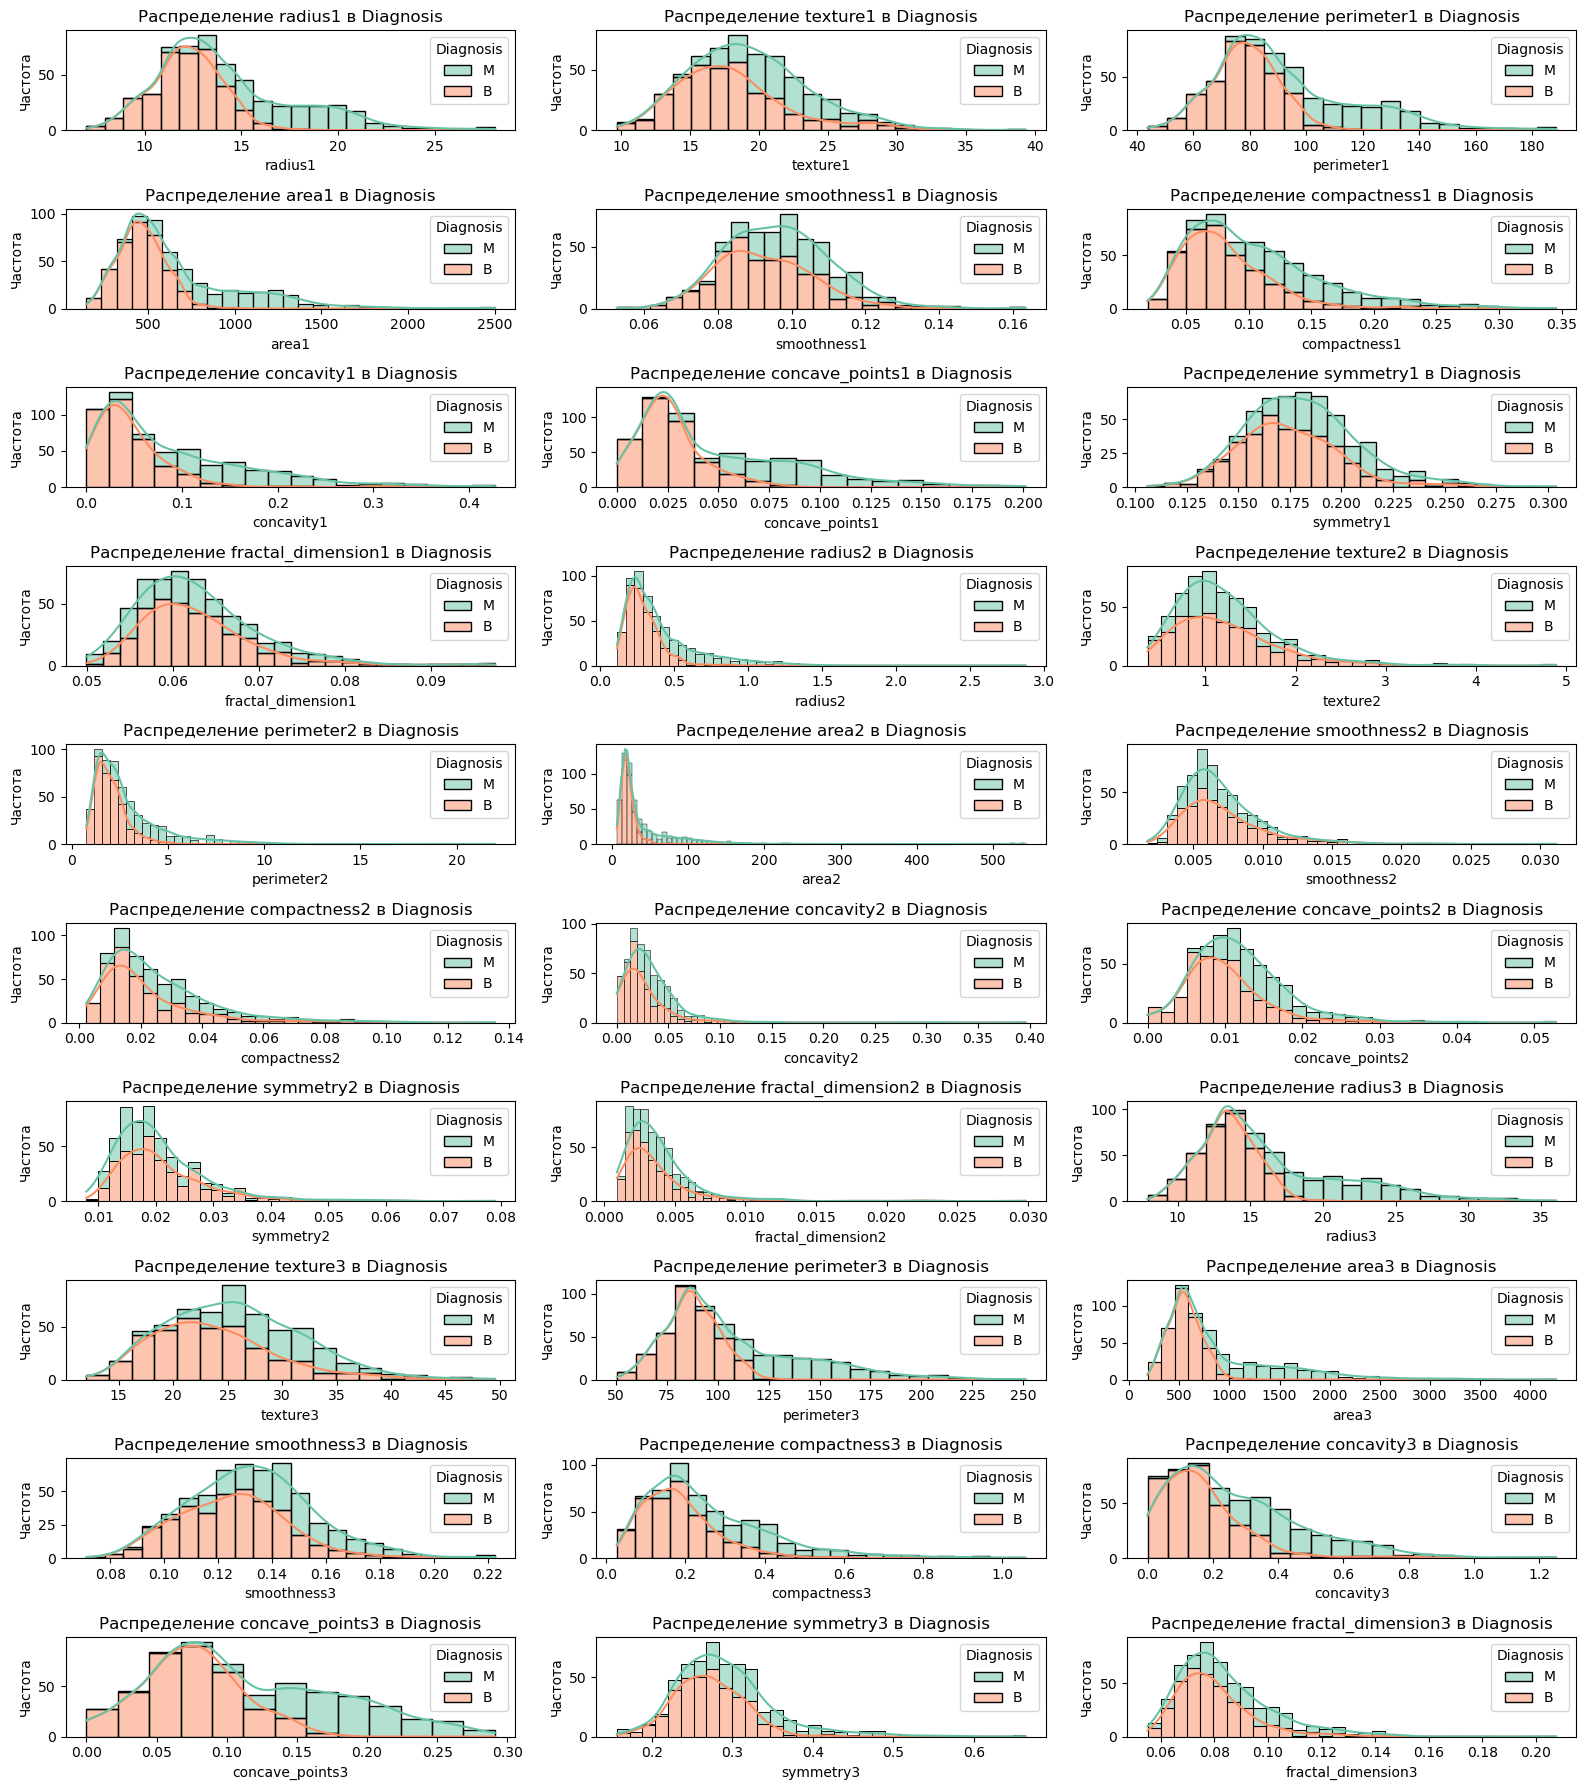

In [14]:
hue = 'Diagnosis'

plt.figure(figsize=(16, 18))

rows = (len(data.drop(hue, axis=1).columns) + 2) // 3

for i, col in enumerate(data.drop(hue, axis=1).columns, 1):

    plt.subplot(rows, 3, i)

    sns.histplot(data, x=col, hue=hue, palette="Set2", multiple="stack", kde=True)

    plt.title(f'Распределение {col} в {hue}')

    plt.xlabel(col)

    plt.ylabel('Частота')

plt.tight_layout()

plt.show()

1 соотвествует в другой версии датасета как mean

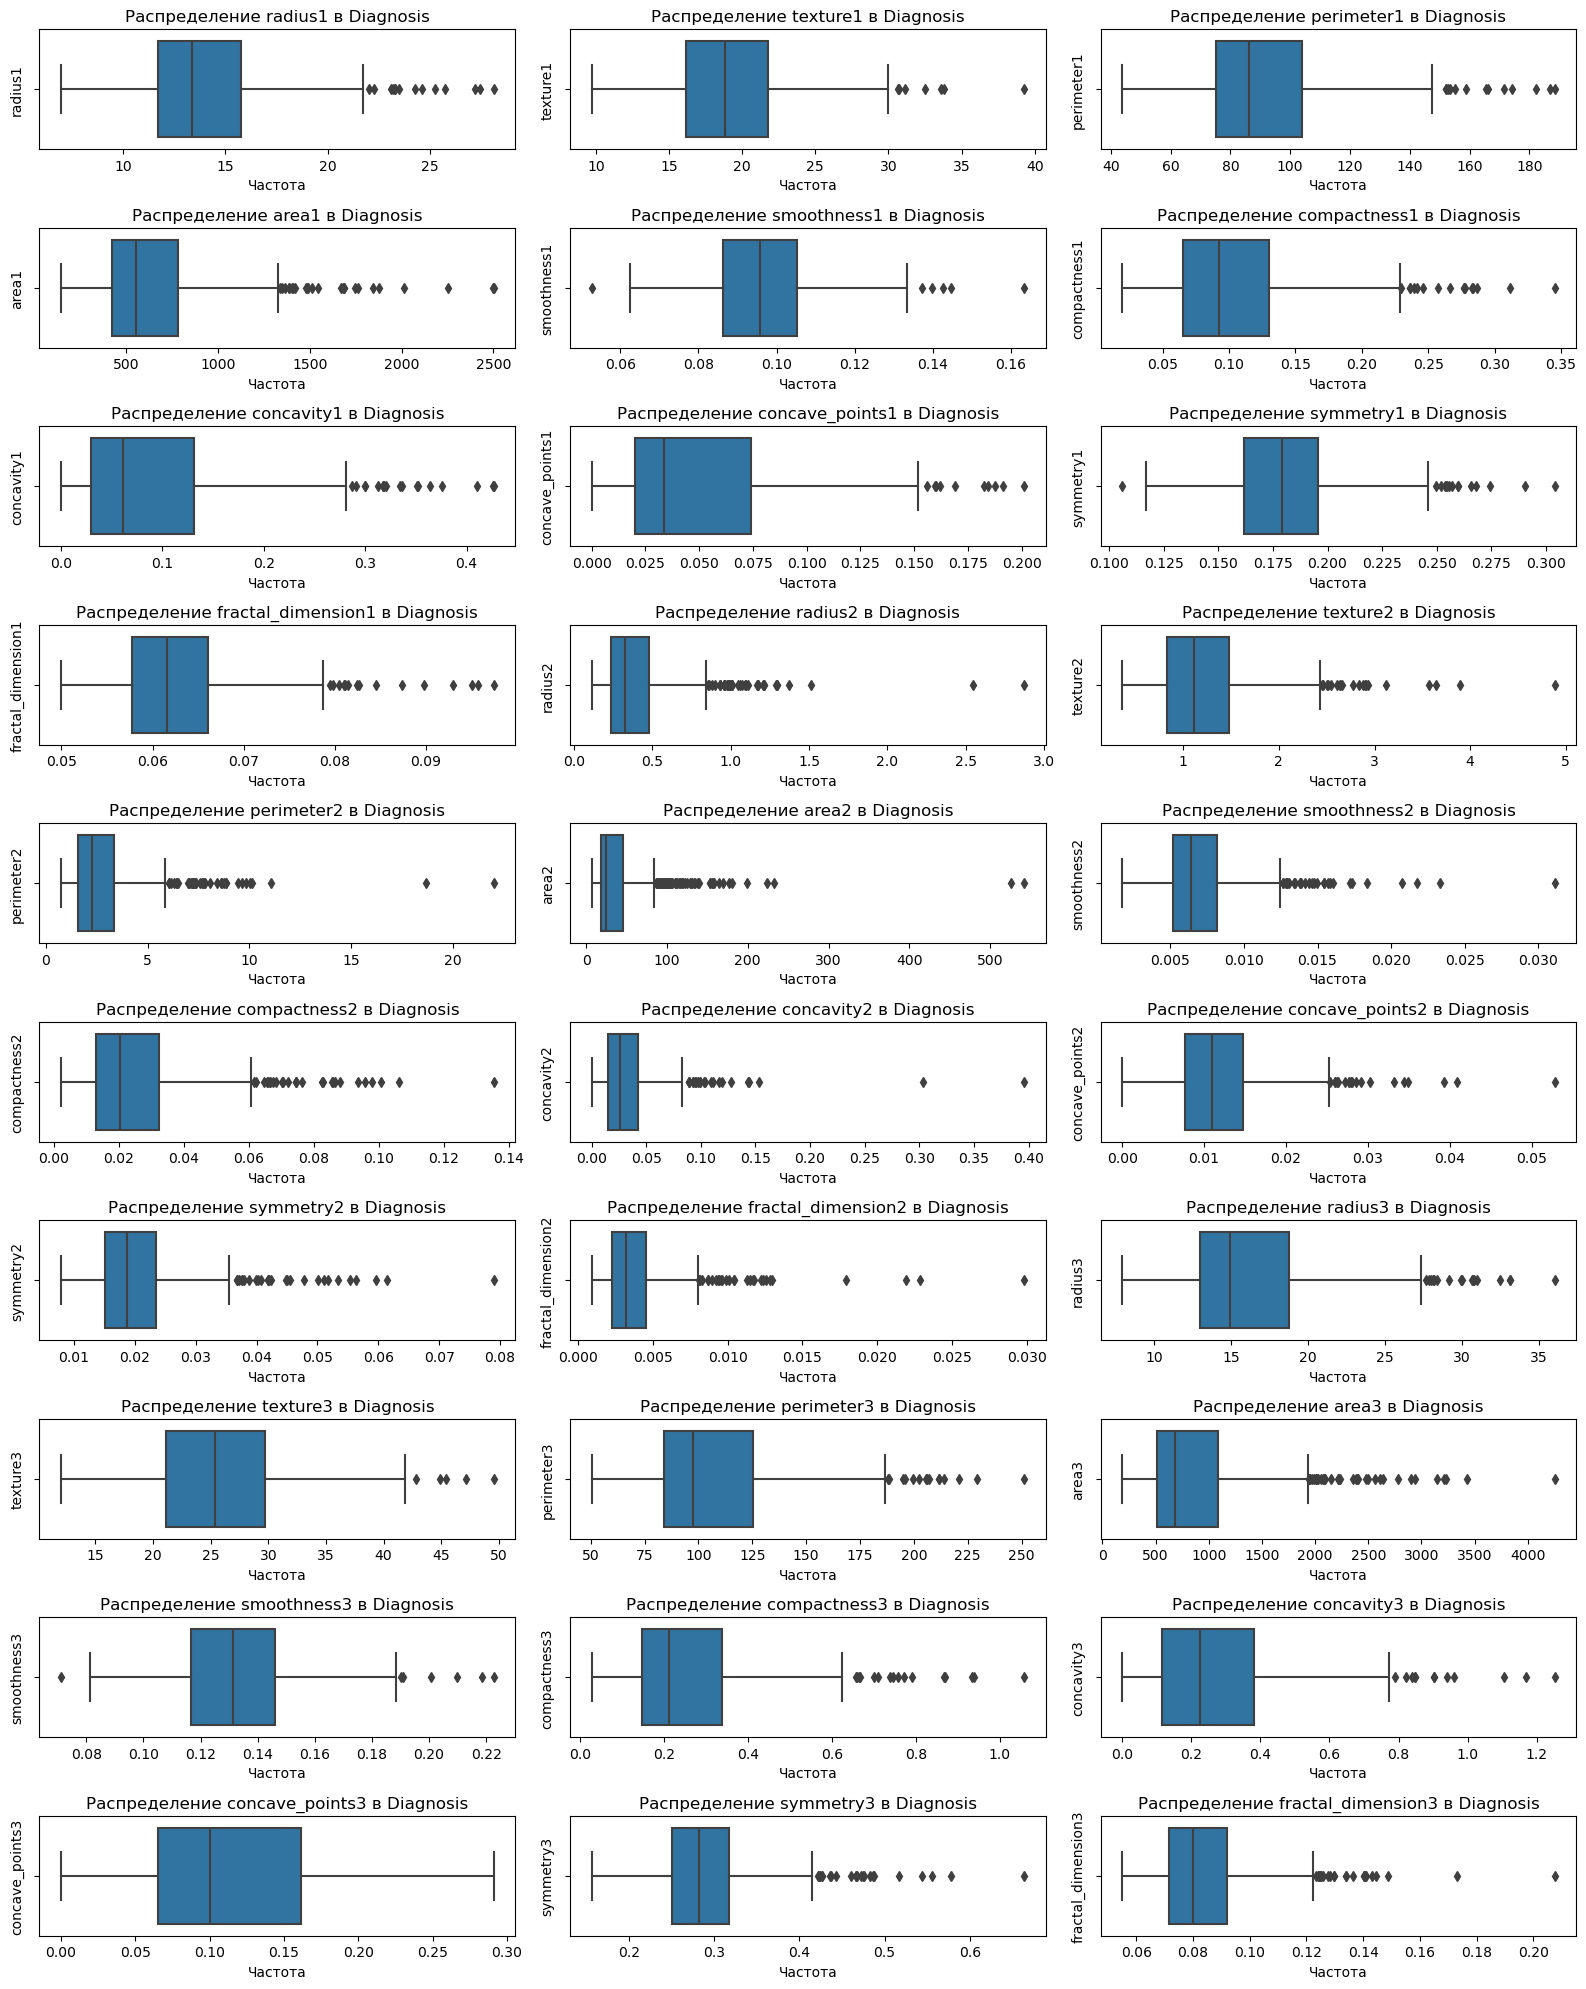

In [15]:
hue = 'Diagnosis'

plt.figure(figsize=(16, 20))

rows = (len(data.drop(hue, axis=1).columns) + 2) // 3

for i, col in enumerate(data.drop(hue, axis=1).columns, 1):

    plt.subplot(rows, 3, i)

    sns.boxplot(data, x=col, hue=hue)

    plt.title(f'Распределение {col} в {hue}')

    plt.ylabel(col)

    plt.xlabel('Частота')

plt.tight_layout()

plt.show()

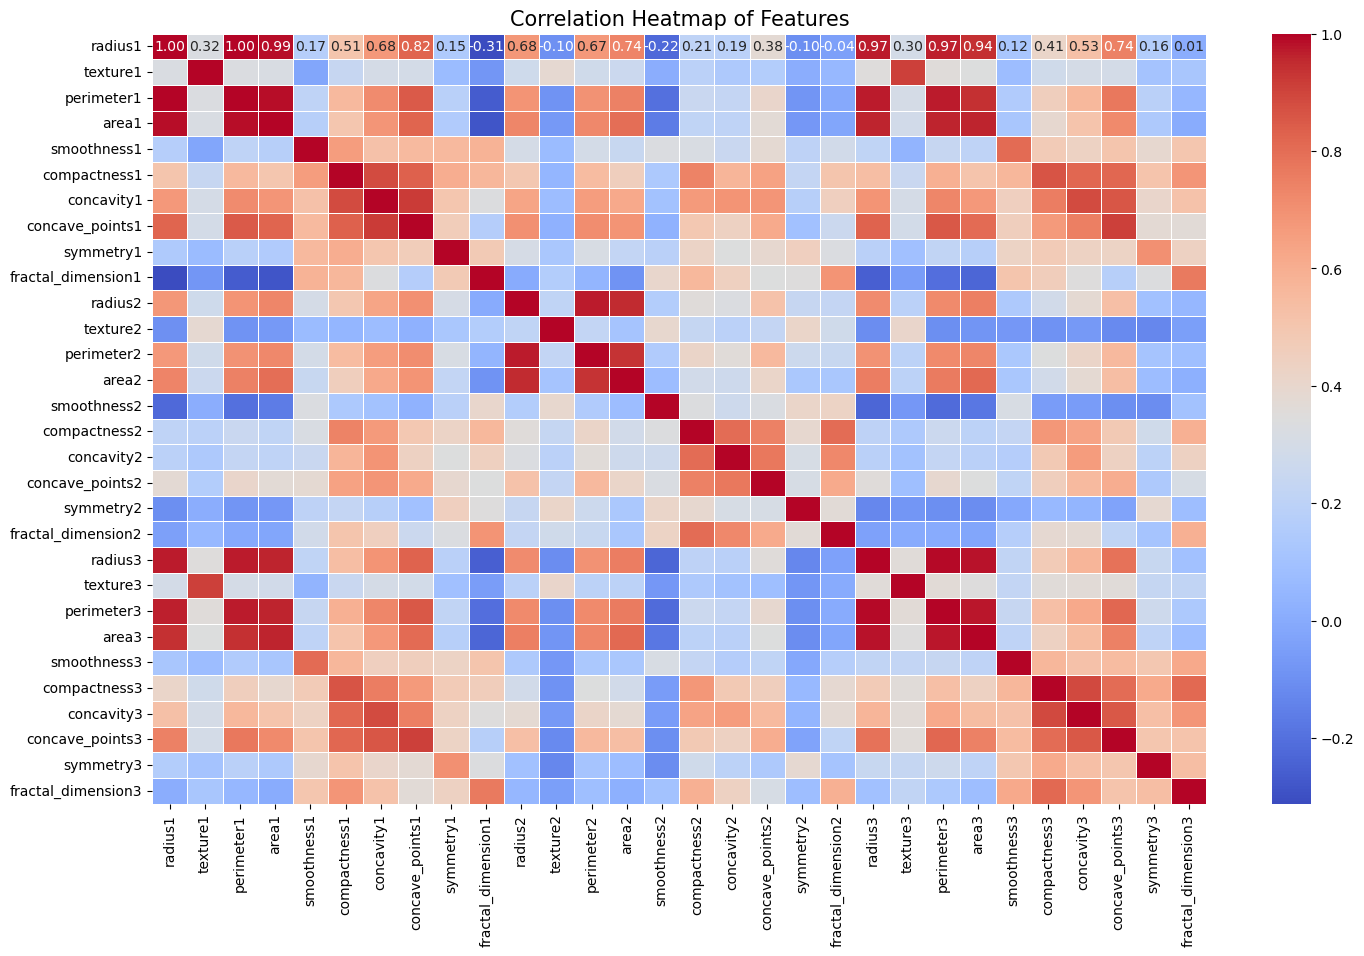

In [16]:
corr_matrix = data.corr(numeric_only=True)



plt.figure(figsize=(17, 10))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Features', size=15)

plt.show()

In [17]:
threshold = 0.8  
high_correlation = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold: 
            high_correlation.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

high_correlation_df = pd.DataFrame(high_correlation, columns=["Variable 1", "Variable 2", "Correlation Coefficient"])
high_correlation_df = high_correlation_df.sort_values(by="Correlation Coefficient", ascending=False)
print(high_correlation_df)

            Variable 1       Variable 2  Correlation Coefficient
0           perimeter1          radius1                 0.997855
24          perimeter3          radius3                 0.993708
1                area1          radius1                 0.987357
2                area1       perimeter1                 0.986507
30               area3          radius3                 0.984015
31               area3       perimeter3                 0.977578
9           perimeter2          radius2                 0.972794
21          perimeter3       perimeter1                 0.970387
15             radius3          radius1                 0.969539
16             radius3       perimeter1                 0.969476
20          perimeter3          radius1                 0.965137
17             radius3            area1                 0.962746
27               area3            area1                 0.959213
22          perimeter3            area1                 0.959120
11               area2   

# Encoding

In [18]:
data["Diagnosis"] = data["Diagnosis"].map({"M":1, "B":0}) # одна категориальная переменная, переведём в бинарный вид

In [19]:
data.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

все переменные теперь числовые

### Data split

In [21]:
# Определение целевой переменной и признаков
target_column = 'Diagnosis'
X = data.drop(columns=[target_column])
y = data[target_column]

In [22]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)

#  Scaler

 Нормализация (масштабирование по стандартному отклонению) и StandardScaler (удаление среднего значения и масштабирование по стандартному отклонению) — два наиболее популярных метода масштабирования. В этом случае мы видим на диаграммах размаха, что некоторые признаки содержат несколько крайних значений, которые нелегко удалить или заменить. Крайние значения часто негативно влияют на среднее значение / дисперсию выборки. Таким образом, приведённые выше два метода масштабирования могут здесь не подойти. В качестве замены мы используем RobustScaler. Этот метод масштабирования более устойчив к выбросам за счёт удаления медианы и масштабирования данных в соответствии с квантильным диапазоном.

In [23]:
scale = RobustScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

### Уменьшение размерности

Из корреляционной матрицы и графиков совместного и предельного распределений видно, что некоторые признаки сильно коррелируют между собой, например, среднее значение радиуса, среднее значение периметра и среднее значение площади. Эти признаки оказывают почти одинаковое влияние на зависимую переменную. В реальных задачах алгоритмы классификации, включающие в набор данных слишком много признаков, обычно страдают от «проклятия размерности», что означает увеличение объёма данных, трудоёмкие вычисления, а также риск переобучения. Этих проблем можно эффективно избежать с помощью выбора признаков (отбора конкретных признаков для включения) и извлечения признаков (извлечения нового набора признаков из входных признаков). 

### PCA

In [24]:
pca = PCA()
pca.fit(X_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig = px.line(x=np.arange(1,exp_var_cumul.shape[0]+1), y=exp_var_cumul, markers=True, labels={'x':'# of components', 'y':'Cumulative Explained Variance'})

#fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=30, y0=0.95, y1=0.95)

fig.show()

* После седьмого компонента наблюдается переломный момент, и 91% общей дисперсии объясняется первыми семью компонентами. Если оставить первые 10 или 17 главных компонентов, мы сможем сохранить около 95% или даже более 99% общей дисперсии.

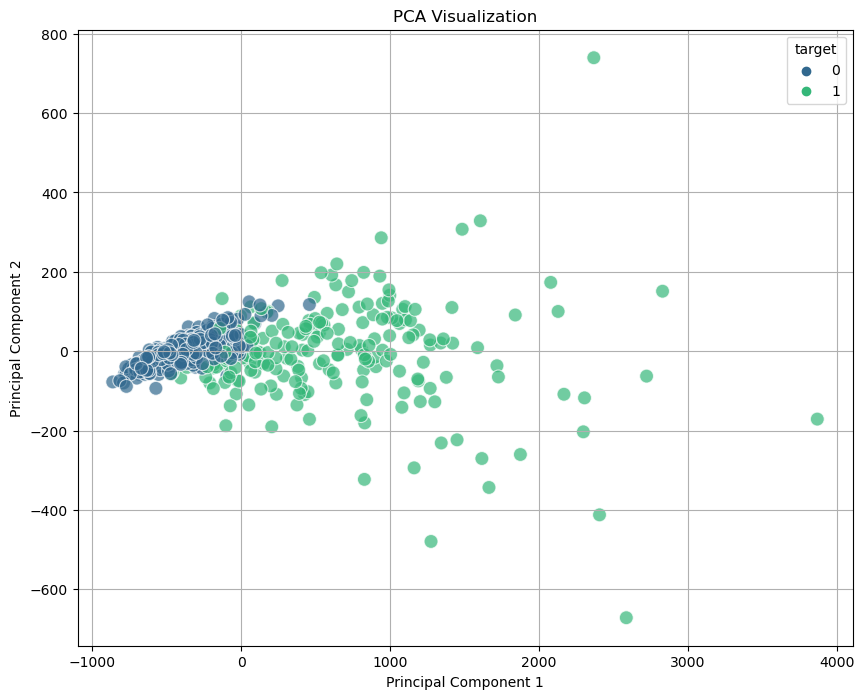

Explained Variance Ratio per Principal Component:
PC1: 0.9820
PC2: 0.0162

Cumulative Explained Variance:
PC1: 0.9820
PC2: 0.9982


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def pca_visualization(X, y, n_components=2):
    """
    Выполняет PCA и визуализирует результаты.

    :param X: DataFrame или массив признаков.
    :param y: Целевая переменная.
    :param n_components: Количество главных компонентов.
    """
    # Выполнение PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(X)

    # Создание DataFrame с главными компонентами
    pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_df['target'] = y

    # Визуализация
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='viridis', s=100, alpha=0.7)
    plt.title('PCA Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='target')
    plt.grid(True)
    plt.show()
    plt.show() 

    # Вывод статистики
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = explained_variance.cumsum()
    
    print("Explained Variance Ratio per Principal Component:")
    for i, variance in enumerate(explained_variance, start=1):
        print(f"PC{i}: {variance:.4f}")
    
    print("\nCumulative Explained Variance:")
    for i, cum_var in enumerate(cumulative_variance, start=1):
        print(f"PC{i}: {cum_var:.4f}")


pca_visualization(X, y)


Вывод статистики:

explained_variance_ratio_: Доля объяснённой дисперсии для каждой главной компоненты.

cumulative_variance: Кумулятивная доля объяснённой дисперсии для последовательных главных компонент.

### Grid Search Cross validation Найдем лучшие гиперпараметры

* для дерева решений

In [26]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [27]:
model = DecisionTreeClassifier(random_state=42)
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)


In [28]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_search.fit(X, y)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [29]:
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность: {grid_search.best_score_:.4f}")

# Оценка модели с лучшими параметрами на всех данных
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Точность на всех данных: {accuracy:.4f}")


Лучшие параметры: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}
Лучшая точность: 0.9298
Точность на всех данных: 0.9947


In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

# Параметры для Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'saga']
}

# Модель и кросс-валидатор
model = LogisticRegression(max_iter=10000, random_state=42)
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Grid Search с кросс-валидацией
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_search.fit(X, y)

# Лучшие параметры и результаты
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность: {grid_search.best_score_:.4f}")

# Оценка модели с лучшими параметрами на всех данных
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Точность на всех данных: {accuracy:.4f}")


c:\Users\ruzho\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


150 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ruzho\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ruzho\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ruzho\anaconda3\Lib\site-packages\sklearn\linear_model\

Лучшие параметры: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Лучшая точность: 0.9596
Точность на всех данных: 0.9772


In [31]:
best_params = grid_search.best_params_
best_model = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    max_iter=10000,
    random_state=42
)
best_model.fit(X_train, y_train)


LogisticRegression(C=100, max_iter=10000, random_state=42)

In [32]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовых данных: {accuracy:.4f}")

# Дополнительно: Вывод отчета по классификации
print("Отчет по классификации:")
print(classification_report(y_test, y_pred))


Точность на тестовых данных: 0.9474
Отчет по классификации:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        71
           1       0.89      0.98      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



# Neural Network

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


In [34]:
# Создаём модель нейронной сети:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\ruzho\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [35]:
# Обучаем модель
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8193 - loss: 0.5753 - val_accuracy: 0.9341 - val_loss: 0.4129
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9030 - loss: 0.3703 - val_accuracy: 0.9451 - val_loss: 0.3025
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9302 - loss: 0.2904 - val_accuracy: 0.9451 - val_loss: 0.2337
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9378 - loss: 0.2082 - val_accuracy: 0.9560 - val_loss: 0.1906
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9538 - loss: 0.1730 - val_accuracy: 0.9670 - val_loss: 0.1666
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9639 - loss: 0.1405 - val_accuracy: 0.9670 - val_loss: 0.1510
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9630 - loss: 0.1227 - val_accuracy: 0.9670 - val_loss: 0.1420
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9738 - loss: 0.0930 - val_accuracy: 0.9670 - 

In [36]:
# Оцениваем модель на тестовых данных
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Точность на тестовых данных: {test_accuracy:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9763 - loss: 0.0862
Точность на тестовых данных: 0.9825


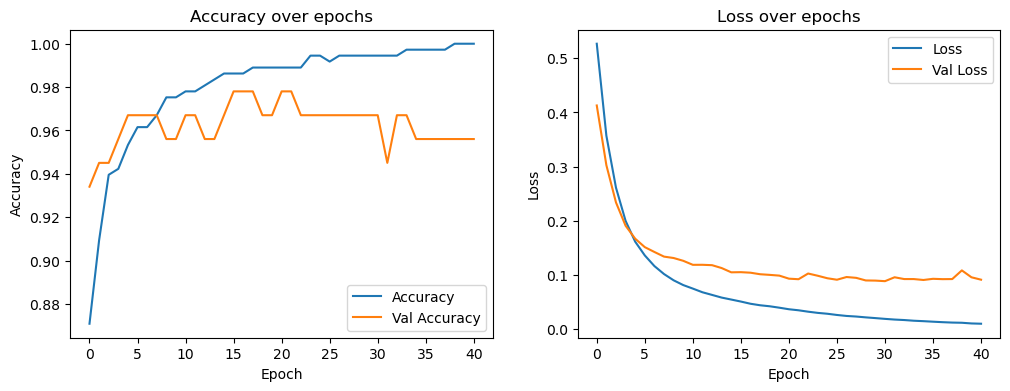

In [37]:
# графики обучения и проверки
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy over epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss over epochs')
plt.show()
